In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
learning_rate = 0.0005
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-23 20:18:30,080 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-23 20:18:30,081 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-23 20:18:30,094 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-23 20:18:30,097 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-23 20:18:30,099 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-23 20:18:30,100 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-23 20:18:30,100 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-23 20:18:30,101 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-23 20:18:30,104 - INFO - Class 'fire' has 730 samples.
2024-12-23 20:18:30,107 - INFO - Class 'nofire' has 1157 samples.
2024-12-23 20:18:30,108 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-23 20:18:32,322 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: mobilenetv2\n")
print("[INFO] Initializing mobilenetv2 model...")
model = initialize_model(
    model_name="mobilenet_v2",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: mobilenetv2

[INFO] Initializing mobilenetv2 model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/mobilenetv2.pt",
    early_stop_patience=8,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8343
Epoch [1]: Train Loss: 0.5961, Train Acc: 0.7006 | Val Loss: 0.5094, Val Acc: 0.7786, Val Recall: 0.9106, Val F1: 0.8343


[INFO] Best model saved with val_f1: 0.8467
Epoch [2]: Train Loss: 0.4760, Train Acc: 0.8098 | Val Loss: 0.4522, Val Acc: 0.8010, Val Recall: 0.8984, Val F1: 0.8467


[INFO] Best model saved with val_f1: 0.8612
Epoch [3]: Train Loss: 0.4238, Train Acc: 0.8235 | Val Loss: 0.4226, Val Acc: 0.8308, Val Recall: 0.8577, Val F1: 0.8612


[INFO] Best model saved with val_f1: 0.8787
Epoch [4]: Train Loss: 0.4000, Train Acc: 0.8405 | Val Loss: 0.3980, Val Acc: 0.8483, Val Recall: 0.8984, Val F1: 0.8787


[INFO] Best model saved with val_f1: 0.8790
Epoch [5]: Train Loss: 0.3882, Train Acc: 0.8294 | Val Loss: 0.3878, Val Acc: 0.8507, Val Recall: 0.8862, Val F1: 0.8790


[INFO] No improvement in val_f1. Patience: 1/8
Epoch [6]: Train Loss: 0.3825, Train Acc: 0.8362 | Val Loss: 0.3755, Val Acc: 0.8458, Val Recall: 0.8943, Val F1: 0.8765


[INFO] No improvement in val_f1. Patience: 2/8
Epoch [7]: Train Loss: 0.3747, Train Acc: 0.8283 | Val Loss: 0.3717, Val Acc: 0.8458, Val Recall: 0.8740, Val F1: 0.8740


[INFO] No improvement in val_f1. Patience: 3/8
Epoch [8]: Train Loss: 0.3438, Train Acc: 0.8590 | Val Loss: 0.3731, Val Acc: 0.8358, Val Recall: 0.8496, Val F1: 0.8636


[INFO] No improvement in val_f1. Patience: 4/8
Epoch [9]: Train Loss: 0.3483, Train Acc: 0.8458 | Val Loss: 0.3580, Val Acc: 0.8458, Val Recall: 0.8862, Val F1: 0.8755


[INFO] No improvement in val_f1. Patience: 5/8
Epoch [10]: Train Loss: 0.3317, Train Acc: 0.8521 | Val Loss: 0.3574, Val Acc: 0.8408, Val Recall: 0.8780, Val F1: 0.8710


[INFO] No improvement in val_f1. Patience: 6/8
Epoch [11]: Train Loss: 0.3439, Train Acc: 0.8574 | Val Loss: 0.3465, Val Acc: 0.8507, Val Recall: 0.8862, Val F1: 0.8790


[INFO] Best model saved with val_f1: 0.8816
Epoch [12]: Train Loss: 0.3427, Train Acc: 0.8495 | Val Loss: 0.3464, Val Acc: 0.8557, Val Recall: 0.8780, Val F1: 0.8816


[INFO] No improvement in val_f1. Patience: 1/8
Epoch [13]: Train Loss: 0.3341, Train Acc: 0.8564 | Val Loss: 0.3467, Val Acc: 0.8433, Val Recall: 0.8659, Val F1: 0.8712


[INFO] No improvement in val_f1. Patience: 2/8
Epoch [14]: Train Loss: 0.3335, Train Acc: 0.8495 | Val Loss: 0.3525, Val Acc: 0.8458, Val Recall: 0.8577, Val F1: 0.8719


[INFO] No improvement in val_f1. Patience: 3/8
Epoch [15]: Train Loss: 0.3189, Train Acc: 0.8627 | Val Loss: 0.3376, Val Acc: 0.8483, Val Recall: 0.8740, Val F1: 0.8758


[INFO] No improvement in val_f1. Patience: 4/8
Epoch [16]: Train Loss: 0.3203, Train Acc: 0.8580 | Val Loss: 0.3411, Val Acc: 0.8507, Val Recall: 0.8740, Val F1: 0.8776


[INFO] No improvement in val_f1. Patience: 5/8
Epoch [17]: Train Loss: 0.3167, Train Acc: 0.8733 | Val Loss: 0.3317, Val Acc: 0.8507, Val Recall: 0.8862, Val F1: 0.8790


[INFO] No improvement in val_f1. Patience: 6/8
Epoch [18]: Train Loss: 0.3318, Train Acc: 0.8543 | Val Loss: 0.3347, Val Acc: 0.8458, Val Recall: 0.8943, Val F1: 0.8765


[INFO] No improvement in val_f1. Patience: 7/8
Epoch [19]: Train Loss: 0.3084, Train Acc: 0.8617 | Val Loss: 0.3438, Val Acc: 0.8458, Val Recall: 0.8577, Val F1: 0.8719


[INFO] No improvement in val_f1. Patience: 8/8
Epoch [20]: Train Loss: 0.3097, Train Acc: 0.8691 | Val Loss: 0.3352, Val Acc: 0.8483, Val Recall: 0.8659, Val F1: 0.8747
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 20 epochs. Best val_f1: 0.8816

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="mobilenetv2",
    save_base_path="outputs/plots/baseline/mobilenetv2",
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline/mobilenetv2\mobilenetv2\mobilenetv2_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.852760736196319, 'recall': 0.8742138364779874, 'f1-score': 0.8633540372670807, 'support': 159.0}, 'Fire': {'precision': 0.9190283400809717, 'recall': 0.9043824701195219, 'f1-score': 0.9116465863453815, 'support': 251.0}, 'accuracy': 0.8926829268292683, 'macro avg': {'precision': 0.8858945381386454, 'recall': 0.8892981532987547, 'f1-score': 0.8875003118062311, 'support': 410.0}, 'weighted avg': {'precision': 0.893329440037899, 'recall': 0.8926829268292683, 'f1-score': 0.8929185002394063, 'support': 410.0}}, 'confusion_matrix': [[139, 20], [24, 227]], 'roc_auc': 0.9531183442331304, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[INFO] Training plot saved to outputs/plots/baseline/mobilenetv2_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/mobilenetv2_baseline_confusion_matrix.png
[INFO] All results saved successfully!


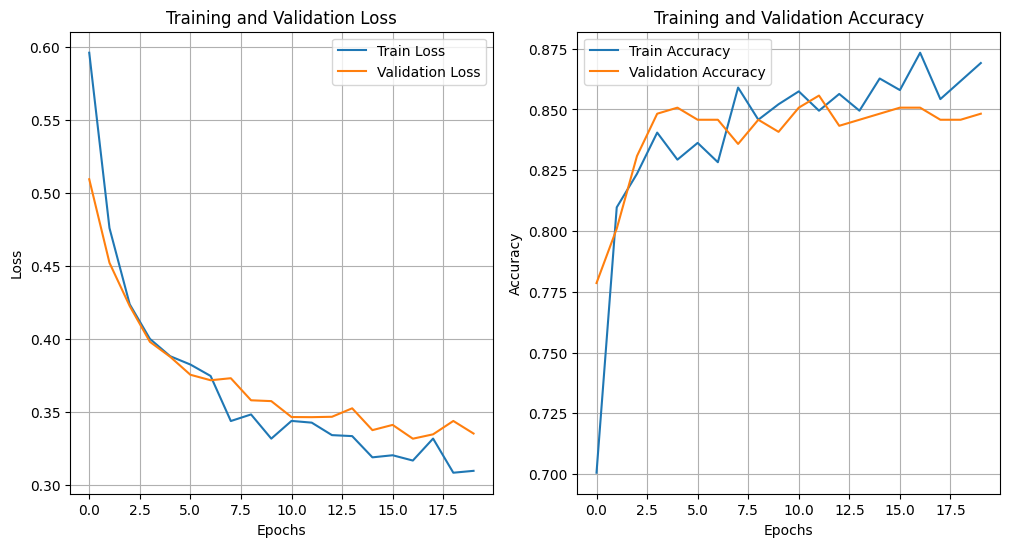

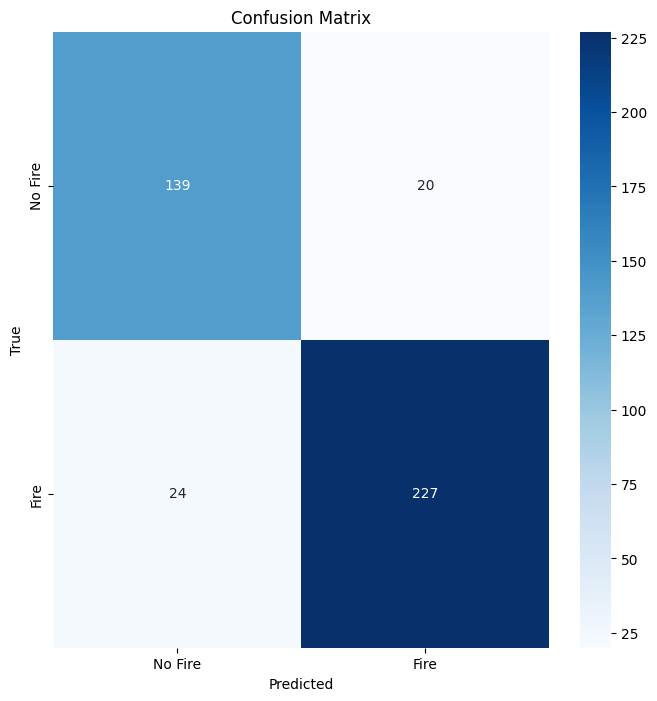

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/mobilenetv2_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/mobilenetv2_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/mobilenetv2_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/mobilenetv2_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")